In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

training=pd.read_csv(r'C:\Users\utkarsh.sharma\Desktop\train.csv')
testing=pd.read_csv(r'C:\Users\utkarsh.sharma\Desktop\test.csv')

In [2]:
#first 5 observations of dset
training.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
#info about dset
training.info()
print(training.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
x    700
y    699
dtype: int64


In [4]:
#one row has a NA y value, so drop the row
training.dropna(axis=0,inplace=True)

In [5]:
testing.info()
#has 300 observations,no NA or np.NaN vals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [6]:
X=training.iloc[:,:-1]
y=training.iloc[:,-1]

In [7]:
X=X.to_numpy().reshape((699,))
y=y.to_numpy()

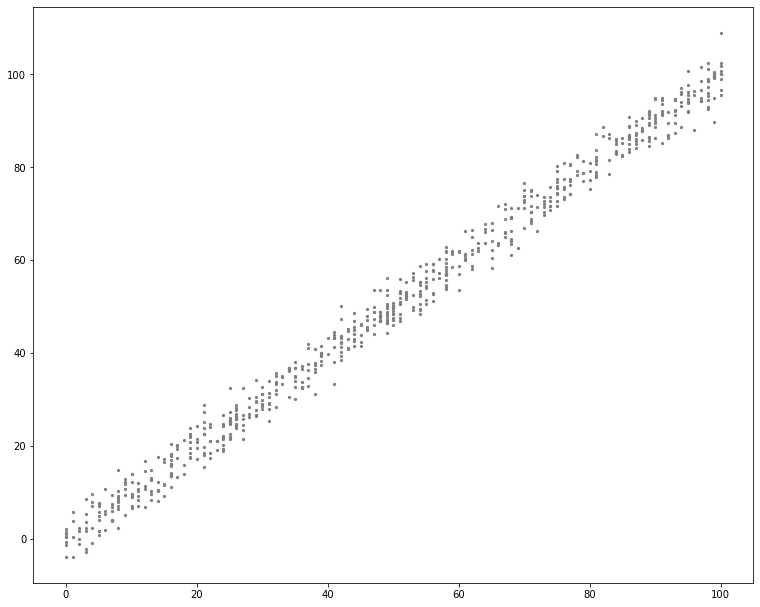

In [8]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])

ax.scatter(X,y,s=5,color='grey')

In [9]:
#slope/coefficient and intercept
m = 0
c = 0

#learning rate
L = 0.0001  
#epoch for mininum iterations to find minimum rss/mse
epochs = 1000  

#number of observations
n = float(len(X)) 

#derivatives wrt to m(theta1) and c(theta0) for the mse=(1/n)*summation(i=0 to n)of(y_pred(hypothesis fn) - y_actual)**2
for i in range(epochs): 
    y_pred = m*X + c  
    D_m = (-1/n) * sum(X * (y - y_pred)) 
    D_c = (-1/n) * sum(y - y_pred) 
    m = m - L * D_m  
    c = c - L * D_c  
    
print (m, c)

0.9988705055011785 0.011937938999784077


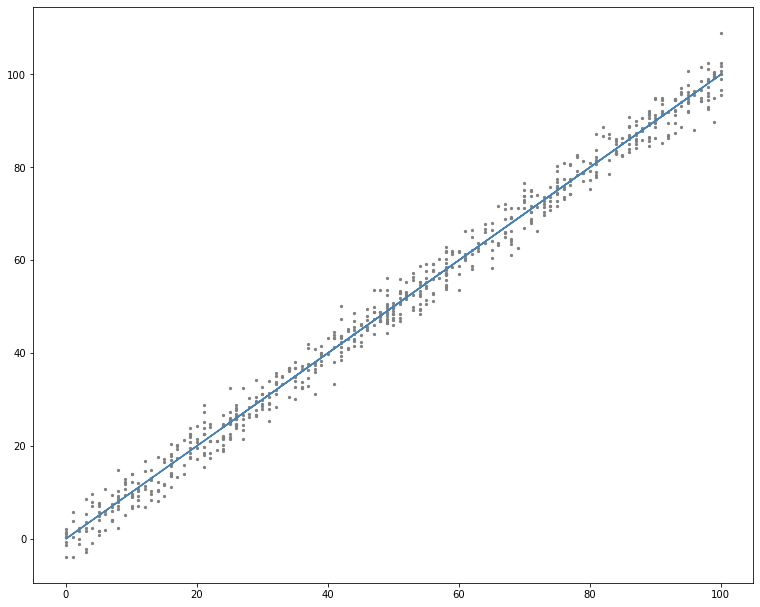

In [10]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])

ax.scatter(X,y,s=5,color='grey')
ax.plot(X,y_pred,color='steelblue')

In [11]:
X_testing=testing.iloc[:,:-1]
y_testing=testing.iloc[:,1]

In [12]:
y_pred_testing=m*X_testing+c

from sklearn.metrics import r2_score
print(r2_score(y_testing,y_pred_testing))

0.9887734053310671


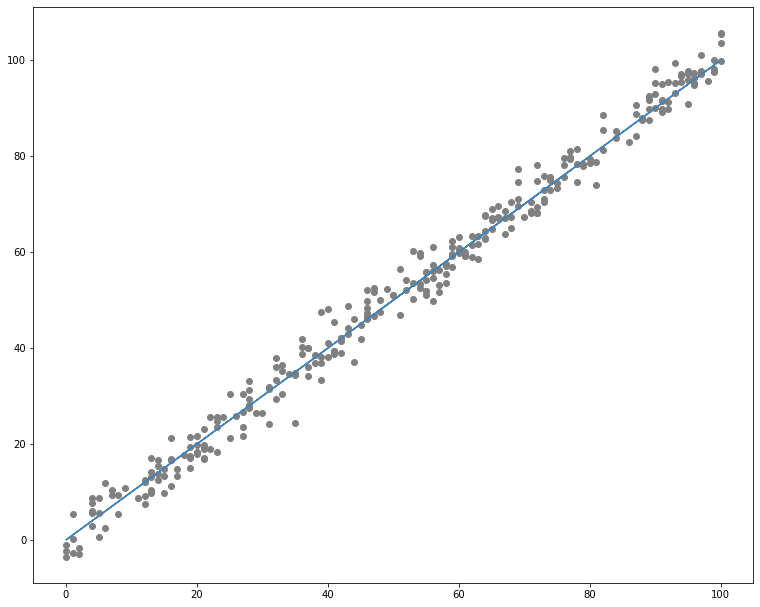

In [13]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])

ax.scatter(X_testing,y_testing,color='grey')
ax.plot(X_testing,y_pred_testing,color='steelblue')